## Stock Price Prediction

### The Data we have is NIFTY-50 Stock Market Data (2000-2020)

#### Stock Price Data of the fifty stocks in NIFTY-50 index from NSE India

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
tcs_data = pd.read_csv('NIFITY-Data/TCS.csv')
tcs_data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2004-08-25,TCS,EQ,850.00,1198.7,1198.7,979.00,985.00,987.95,1008.32,17116372,1.725876e+15,NaN,5206360,0.3042
1,2004-08-26,TCS,EQ,987.95,992.0,997.0,975.30,976.85,979.00,985.65,5055400,4.982865e+14,NaN,1294899,0.2561
2,2004-08-27,TCS,EQ,979.00,982.4,982.4,958.55,961.20,962.65,969.94,3830750,3.715586e+14,NaN,976527,0.2549
3,2004-08-30,TCS,EQ,962.65,969.9,990.0,965.00,986.40,986.75,982.65,3058151,3.005106e+14,NaN,701664,0.2294
4,2004-08-31,TCS,EQ,986.75,986.5,990.0,976.00,987.80,988.10,982.18,2649332,2.602133e+14,NaN,695234,0.2624


In [3]:
tcs_data_train = tcs_data[:3807]
tcs_data_test = tcs_data[3807:]

In [4]:
tcs_data_train.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
3802,2019-12-24,TCS,EQ,2231.70,2239.0,2243.55,2211.15,2216.00,2215.60,2223.00,1805896,4.014505e+14,100655.0,892665,0.4943
3803,2019-12-26,TCS,EQ,2215.60,2216.4,2229.00,2195.20,2202.00,2201.95,2207.75,1880367,4.151371e+14,89812.0,832102,0.4425
3804,2019-12-27,TCS,EQ,2201.95,2208.0,2226.40,2176.00,2209.90,2198.50,2192.11,2720261,5.963119e+14,93892.0,1285882,0.4727
3805,2019-12-30,TCS,EQ,2198.50,2207.0,2225.00,2177.10,2183.35,2183.20,2194.63,2288830,5.023141e+14,84027.0,935920,0.4089
3806,2019-12-31,TCS,EQ,2183.20,2189.0,2197.00,2157.45,2165.00,2161.70,2171.67,1909289,4.146355e+14,69597.0,837101,0.4384


In [44]:
tcs_data_test.shape

(189, 15)

In [5]:
tcs_data_test.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
3807,2020-01-01,TCS,EQ,2161.70,2168.00,2183.90,2154.0,2170.00,2167.60,2170.54,1354908,2.940882e+14,44438.0,164490,0.1214
3808,2020-01-02,TCS,EQ,2167.60,2179.95,2179.95,2149.2,2157.00,2157.65,2158.63,2380752,5.139156e+14,99242.0,1204079,0.5058
3809,2020-01-03,TCS,EQ,2157.65,2164.00,2223.00,2164.0,2201.00,2200.65,2199.26,4655761,1.023921e+15,123516.0,1833823,0.3939
3810,2020-01-06,TCS,EQ,2200.65,2205.00,2225.95,2187.9,2201.35,2200.45,2204.89,3023209,6.665855e+14,135360.0,1000021,0.3308
3811,2020-01-07,TCS,EQ,2200.45,2200.50,2214.65,2183.8,2205.00,2205.85,2203.53,2429317,5.353064e+14,95018.0,966753,0.3980


In [6]:
training_data = tcs_data_train[['Open']].values

In [7]:
training_data

array([[1198.7],
       [ 992. ],
       [ 982.4],
       ...,
       [2208. ],
       [2207. ],
       [2189. ]])

### Let's Do Some Feature Scaling

In [8]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set_scaled = sc.fit_transform(training_data)

In [9]:
len(training_set_scaled)

3807

In [10]:
## Now We Create a data structure with 60 timestamps and one output
x_train = []
y_train = []
for i in range(60, 3807):
    x_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [11]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [12]:
x_train[0]

array([[0.25687596],
       [0.19356815],
       [0.19062787],
       [0.18679939],
       [0.19188361],
       [0.19295559],
       [0.19292496],
       [0.19785605],
       [0.2082389 ],
       [0.20673813],
       [0.19479326],
       [0.19509954],
       [0.19295559],
       [0.19326187],
       [0.19754977],
       [0.20153139],
       [0.19816233],
       [0.19969372],
       [0.20594181],
       [0.2036294 ],
       [0.21084227],
       [0.21071975],
       [0.20493109],
       [0.20444104],
       [0.20091884],
       [0.20191424],
       [0.2069219 ],
       [0.20490046],
       [0.21347626],
       [0.22061256],
       [0.22082695],
       [0.22143951],
       [0.22603369],
       [0.22661562],
       [0.22664625],
       [0.22970904],
       [0.22756508],
       [0.2332925 ],
       [0.23705972],
       [0.23894334],
       [0.24036753],
       [0.23805513],
       [0.23430322],
       [0.2314242 ],
       [0.23958652],
       [0.24042879],
       [0.24745789],
       [0.241

### Let's Build a RNN and train it on this data


In [15]:
## importing the Keras libraries and packages
import tensorflow as tf

In [17]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout

In [18]:
# Initialize the layer
regressor = Sequential()

In [19]:
## Adding the LSTM layers and some Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [20]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

In [21]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [22]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [23]:
## Adding the Output Layer
regressor.add(Dense(units=1))

In [24]:
## Now lets compile the model
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [25]:
## Fitting the RNN to a training set
regressor.fit(x_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
118/118 [==============================] - 9s 78ms/step - loss: 0.0127
Epoch 2/100
118/118 [==============================] - 9s 78ms/step - loss: 0.0041
Epoch 3/100
118/118 [==============================] - 10s 82ms/step - loss: 0.0033
Epoch 4/100
118/118 [==============================] - 10s 86ms/step - loss: 0.0033
Epoch 5/100
118/118 [==============================] - 10s 85ms/step - loss: 0.0028
Epoch 6/100
118/118 [==============================] - 11s 94ms/step - loss: 0.0025
Epoch 7/100
118/118 [==============================] - 11s 93ms/step - loss: 0.0027
Epoch 8/100
118/118 [==============================] - 11s 91ms/step - loss: 0.0024
Epoch 9/100
118/118 [==============================] - 11s 91ms/step - loss: 0.0022
Epoch 10/100
118/118 [==============================] - 11s 93ms/step - loss: 0.0023
Epoch 11/100
118/118 [==============================] - 11s 91ms/step - loss: 0.0020
Epoch 12/100
118/118 [==============================] - 11s 95ms/step - loss

118/118 [==============================] - 10s 89ms/step - loss: 6.8935e-04
Epoch 94/100
118/118 [==============================] - 10s 87ms/step - loss: 6.6888e-04
Epoch 95/100
118/118 [==============================] - 10s 85ms/step - loss: 6.6039e-04
Epoch 96/100
118/118 [==============================] - 10s 88ms/step - loss: 7.0137e-04
Epoch 97/100
118/118 [==============================] - 10s 87ms/step - loss: 6.3330e-04
Epoch 98/100
118/118 [==============================] - 10s 86ms/step - loss: 6.9030e-04
Epoch 99/100
118/118 [==============================] - 10s 89ms/step - loss: 6.9869e-04
Epoch 100/100
118/118 [==============================] - 10s 87ms/step - loss: 6.8866e-04


In [41]:
tcs_month = tcs_data_test.head(23)
tcs_month.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
3825,2020-01-27,TCS,EQ,2183.40,2189.7,2193.45,2165.0,2168.30,2169.25,2172.99,1549101,3.366188e+14,62160.0,771303,0.4979
3826,2020-01-28,TCS,EQ,2169.25,2174.0,2187.80,2152.0,2183.80,2183.75,2169.48,1743024,3.781454e+14,79762.0,906541,0.5201
3827,2020-01-29,TCS,EQ,2183.75,2185.0,2186.95,2150.0,2154.00,2154.60,2164.12,2306761,4.992116e+14,88479.0,1307797,0.5669
3828,2020-01-30,TCS,EQ,2154.60,2160.0,2165.00,2125.0,2134.65,2137.85,2140.26,2098567,4.491487e+14,88883.0,1056509,0.5034
3829,2020-01-31,TCS,EQ,2137.85,2139.4,2144.35,2071.6,2082.40,2079.05,2098.15,3287223,6.897092e+14,131558.0,2194449,0.6676


In [45]:
dataset_total = pd.concat((tcs_data_train['Open'], tcs_data_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total)-len(tcs_data_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
x_test = []
for i in range(60,249):
    x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

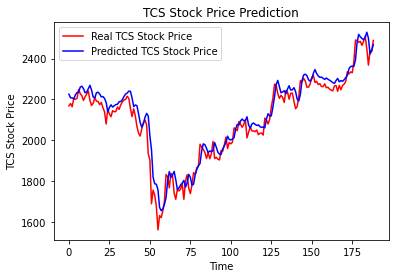

In [47]:
plt.plot(tcs_data_test.Open.values, color = 'red', label = 'Real TCS Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted TCS Stock Price')
plt.title('TCS Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TCS Stock Price')
plt.legend()
plt.show()